In [1]:
from pathlib import Path

path_crud = Path(
    "../../Static Analysis/impl-crud/crud_chidamber-kemerer.csv")

path_cqrs = Path(
    "../../Static Analysis/impl-es-cqrs/es-cqrs-chidamber-kemerer.csv"
)

In [3]:
import pandas as pd

crud = pd.read_csv(path_crud, skiprows=1)
cqrs = pd.read_csv(path_cqrs, skiprows=1)

crud = crud.fillna(0)
cqrs = cqrs.fillna(0)

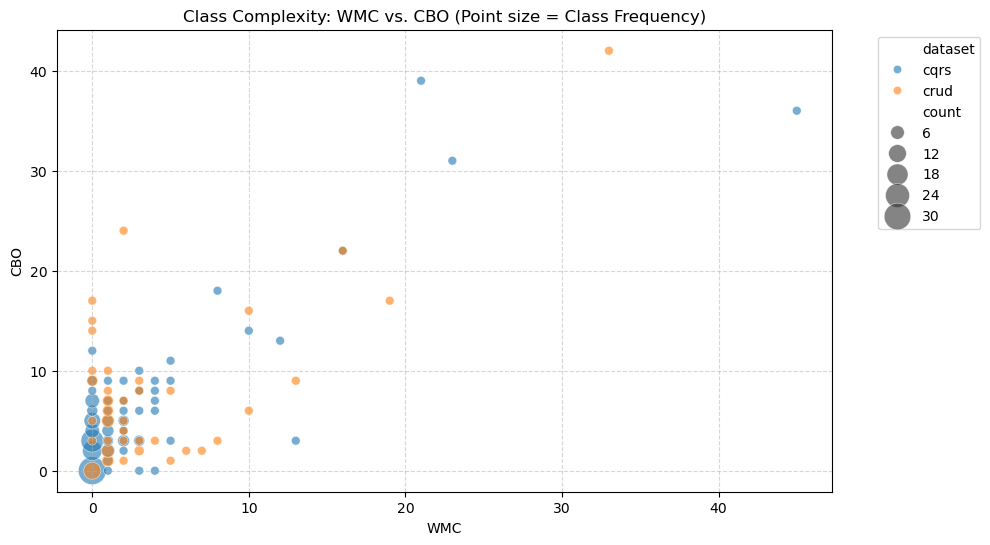

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

concat = pd.concat([crud.assign(dataset='crud'), cqrs.assign(dataset='cqrs')])

# 2. Group by coordinates and dataset to find the "weight" (count) of each point
plot_data = concat.groupby(['WMC', 'CBO', 'dataset']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_data,
    x='WMC',
    y='CBO',
    hue='dataset',  # Distinct colors per dataset
    size='count',  # Larger points for more classes at that position
    sizes=(40, 400),  # Range of point sizes
    alpha=0.6,  # Transparency helps see overlaps even better
)

plt.title('Class Complexity: WMC vs. CBO (Point size = Class Frequency)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()